Sales Analysis workbook by Paul Owe

This is a walkthrough of how I would use Pandas & Matplotlib to analyze and answer business questions about 12 months worth of sales data. The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc.

In [6]:
import pandas as pd
import os

# Task 1: Merging the 12 months of sales data into a single CSV file

In [4]:
df = pd.read_csv("./data/Sales_April_2019.csv") # data for April
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2004-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,2004-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2004-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [10]:
# put all file objects in a list 

files = [file for file in os.listdir('./data')]

#concatenate all these files

all_months_data = pd.DataFrame() # empty df to hold your concatenated data

for file in files:
    df = pd.read_csv('./data/'+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False) # index false ignores that first column beside Orderid


In [33]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## What was the best month for sales? How much was earned that month?

To answer this question we will need to 
- Multiply qty x price and
- group results by month

Approach is to create specific column for:
- Month, and 
- Sales

In [40]:
# Clean Data - Find all Nan in data set

nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

#Drop all NaN

all_data = all_data.dropna(how='all')

So, we see that our data was dirty because our concatenation process also added the column names over and over again. 
To remove these we can simply copy the filtering code and modify it a little bit

In [45]:
#index all_data[based on a condition]
all_data = all_data[all_data['Month'] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [46]:
# Month column
all_data['Month'] = all_data['Order Date'].str[0:2]
pd.to_numeric(all_data['Month'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [49]:
# Step 1: Multiply qty by price

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


Now, to answer this question, we will group by month and sum up the sales quantities

In [60]:
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
01,10903,1.811768e+06,1.822257e+06
02,13449,2.188885e+06,2.202022e+06
03,17005,2.791208e+06,2.807100e+06
04,12356,2.056151e+06,2.071078e+06
05,18638,3.124570e+06,3.142047e+06
06,15253,2.562026e+06,2.577802e+06
07,16072,2.632540e+06,2.647776e+06
08,13448,2.230345e+06,2.244468e+06
09,13109,2.084992e+06,2.097560e+06


In [62]:
wrong_month_data = all_data[all_data['Month'] == '20']
wrong_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
25118,176559,Bose SoundSport Headphones,1,99.99,2004-07-19 22:30,"682 Chestnut St, Boston, MA 02215",20,99.99
25119,176560,Google Phone,1,600.00,2004-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",20,600.00
25120,176560,Wired Headphones,1,11.99,2004-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",20,11.99
25123,176563,Bose SoundSport Headphones,1,99.99,2004-02-19 7:46,"668 Center St, Seattle, WA 98101",20,99.99
25124,176564,USB-C Charging Cable,1,11.95,2004-12-19 10:58,"790 Ridge St, Atlanta, GA 30301",20,11.95


Looks like some of the dates were not formatted properly so we have a '20th month'
We will fix this below and rerun our groupby month and sum sales function again

In [74]:
wrong_month_data['Month'] = wrong_month_data['Order Date'].str[5:7]

wrong_month_data.head()

all_data[all_data['Month'] == '20'] = wrong_month_data
results = all_data.groupby('Month').sum()

/Users/pcowe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Visualization

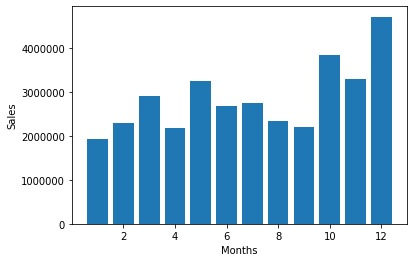

In [77]:
import matplotlib.pyplot as plt

months = range(1, 13)
plt.ylabel('Sales')
plt.xlabel('Months')
plt.bar(months, results['Sales'])
plt.show()
